In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
plt.rcParams.update({'figure.max_open_warning': 0})
import numpy as np 
import pandas as pd 
import seaborn as sns 
import importlib
import drought_ibf_utility as ibf
importlib.reload(ibf)

<module 'drought_ibf_utility' from 'D:\\Behrouz\\Big_data\\Red_Cross\\Drought_IBF\\Model Event Data\\drought_ibf_utility.py'>

In [2]:
filename = './datasets/Uganda_seasonal_normalized.csv'
data = pd.read_csv(filename)
data.dropna(inplace=True)
data.head()

,year,District,Season,EVI,NDVI,SPEI_3month,SoilMoisture00_10cm,SoilMoisture100_200cm,SoilMoisture10_40cm,SoilMoisture40_100cm,...,air_temperature,evapotranspiration,precipitation_per_hour_v1,precipitation_per_hour_v2,rainfall,surface_temperature_daytime,surface_temperature_nighttime,water_balance,wind_speed,drought_reported
0,2000,ABIM,11_12,0.635496,0.232554,0.946693,0.876312,0.199678,0.736812,0.605763,...,-0.435935,1.208654,1.601028,-0.469460,1.336204,-0.151764,-1.343323,0.841488,-0.412148,False
1,2000,ABIM,6_7,-1.590836,-1.720571,0.075238,-1.302612,-1.113239,-1.262019,-0.937505,...,1.570308,-0.740945,-0.358292,-1.030145,-0.388903,1.260564,0.032762,-0.114317,0.306375,False
2,2000,ADJUMANI,11_12,-1.085335,-1.260320,-0.606487,-0.724946,-0.722124,-0.683251,-0.829818,...,-0.221168,-1.138716,0.041021,-2.093348,-1.024165,1.721439,-1.782573,-0.675508,-0.412293,False
3,2000,ADJUMANI,6_7,-2.697474,-3.056846,-0.816605,-0.872943,0.243240,-0.161562,0.000243,...,1.546512,-0.115219,-1.671680,-1.859843,-0.681410,2.350867,-0.480881,-0.793150,0.608132,False
4,2000,AGAGO,11_12,1.149972,-0.070580,0.824262,0.874588,0.624983,0.793872,0.710458,...,-0.380892,1.126550,1.366786,0.265181,0.963633,-0.414698,-2.063056,0.573377,-0.467823,False


In [3]:
id_cols = ['year','District','Season']

label_name = 'drought_reported'

All_features = list(data.drop(labels=id_cols+[label_name], 
                                  axis=1).columns)

# Training the model on all the features

In [4]:
selected_features = All_features

opt_model, X, y, X_train, y_train, X_val, y_val, X_test, y_test, y_pred_val, y_pred_test = ibf.fit_xgb_model(data, 
                                                                                                         selected_features, 
                                                                                                         label_name,
                                                                                                         verbose=False)
ibf.print_metrics(y_test, y_pred_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive         4                 7
Actual negative         3                 6

Accuracy  0.50
Average F-score  0.49
 
           Positive      Negative
Num case       11             9
Precision    0.57          0.46
Recall       0.36          0.67
F-score      0.44          0.55


,features,importance
0,SPEI_3month,0.145341
1,precipitation_per_hour_v2,0.121921
2,SoilTemperature100_200cm,0.087768
3,EVI,0.062345
4,wind_speed,0.057240
5,NDVI,0.056365
6,air_temperature,0.055443
7,SoilTemperature40_100cm,0.054251
8,water_balance,0.052159
9,surface_temperature_nighttime,0.050438


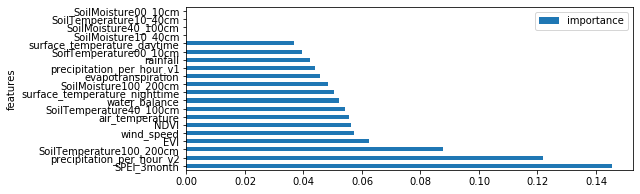

In [5]:
ibf.get_feature_importances(opt_model,selected_features,len(selected_features))

## Trainig Model on the most important features

In [6]:
selected_features = ['SoilTemperature100_200cm', 'precipitation_per_hour_v2'
                    ,'SPEI_3month']

opt_model, X, y, X_train, y_train, X_val, y_val, X_test, y_test, y_pred_val, y_pred_test = ibf.fit_xgb_model(data, 
                                                                                                         selected_features, 
                                                                                                         label_name,
                                                                                                         verbose=False)
ibf.print_metrics(y_test, y_pred_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive         5                 6
Actual negative         2                 7

Accuracy  0.60
Average F-score  0.60
 
           Positive      Negative
Num case       11             9
Precision    0.71          0.54
Recall       0.45          0.78
F-score      0.56          0.64


,features,importance
0,precipitation_per_hour_v2,0.393157
1,SoilTemperature100_200cm,0.315168
2,SPEI_3month,0.291675


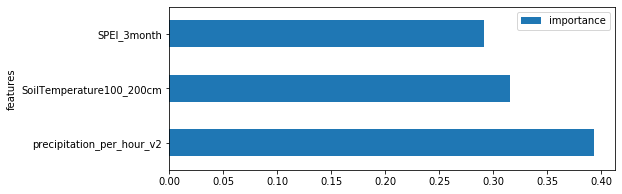

In [7]:
ibf.get_feature_importances(opt_model,selected_features,len(selected_features))